# Piecewise Exact Method: Influence of time discretization

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
from piecewise_method import calculateResponse

# System constants
m = 1000        # Mass [kg]
k = 20000       # Stifness [N/m]
xi = 0.05       # Damping ratio
P = 750         # Force magnitude [N]
f = 1           # Force frequency [Hz]

# Calculating dynamic parameters
omega_n = np.sqrt(k / m)                # Natural frequency [rad/s]
f_n = omega_n / (2 * np.pi)             # Undamped natural frequency [Hz]
omega_d = omega_n * np.sqrt(1 - xi**2)  # Damped natural frequency [rad/s]
omega = 2 * np.pi * f                   # Force frequency [rad/s]
beta = omega / omega_n                  # Frequency ratio

# Time parameters
t_max = 100                             # Maximun time [s]

## Function to generate time and force vector for diferent timestep

In [2]:
def generateVector(timestep):
    nPoints = int(t_max / timestep)
    t = np.linspace(0, t_max, nPoints)      # Time vector [s]
    P_sine = P * np.sin(omega * t)          # Experimental harmonic force [N]
    return t, P_sine

In [3]:
# Calling the generateVector functions

t_1, P_1 = generateVector(0.1)
t_2, P_2 = generateVector(0.05)
t_3, P_3 = generateVector(0.01)
t_4, P_4 = generateVector(0.005)

## Calculating the system response for diferent timestep

In [4]:
position_1, velocity_1 = calculateResponse(t_1, P_1, 0, 0, k, omega_n, omega_d, xi, delta_t=0.1)
position_2, velocity_2 = calculateResponse(t_2, P_2, 0, 0, k, omega_n, omega_d, xi, delta_t=0.05)
position_3, velocity_3 = calculateResponse(t_3, P_3, 0, 0, k, omega_n, omega_d, xi, delta_t=0.01)
position_4, velocity_4 = calculateResponse(t_4, P_4, 0, 0, k, omega_n, omega_d, xi, delta_t=0.005)

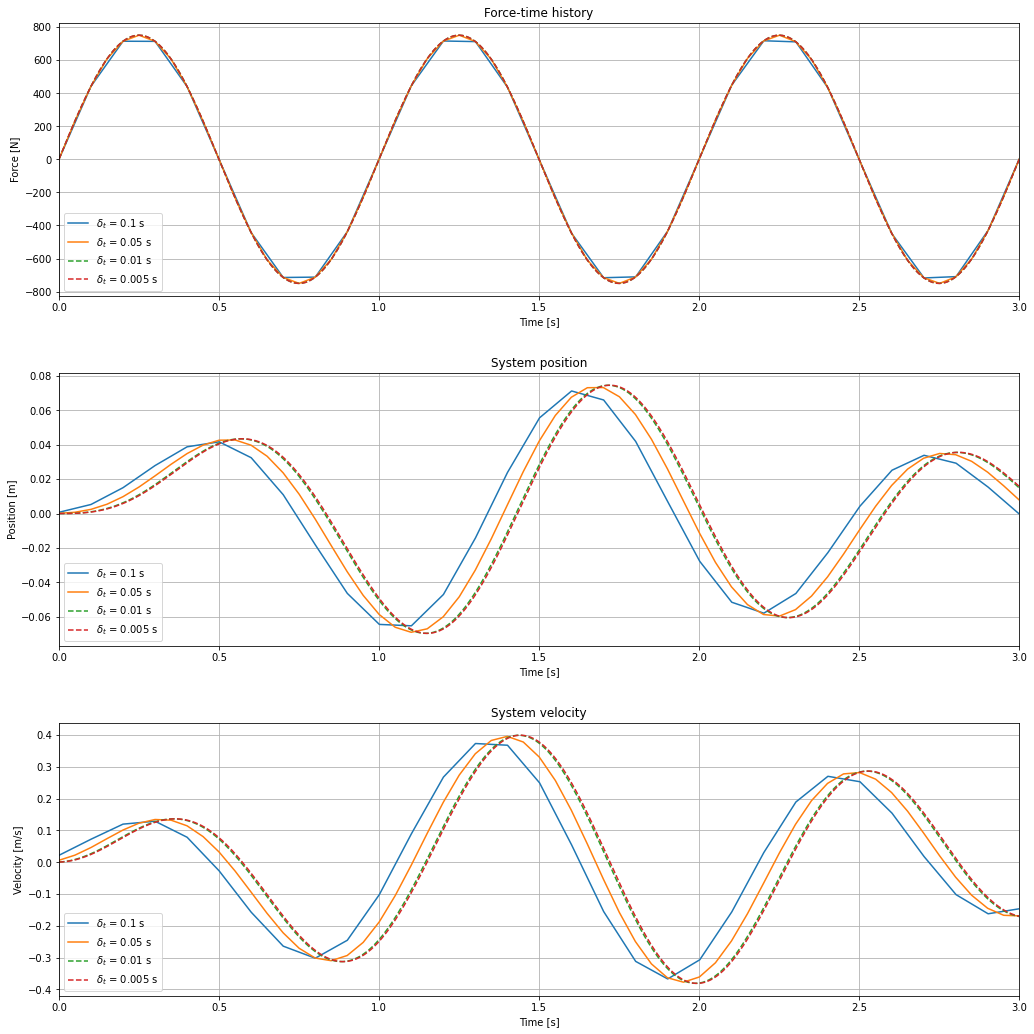

In [6]:
# Plotting the results
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=1)

# Force plots
axes[0].plot(t_1, P_1, "-", label="$\delta_t$ = 0.1 s")
axes[0].plot(t_2, P_2, "-", label="$\delta_t$ = 0.05 s")
axes[0].plot(t_3, P_3, "--", label="$\delta_t$ = 0.01 s")
axes[0].plot(t_4, P_4, "--", label="$\delta_t$ = 0.005 s")
axes[0].set_title("Force-time history")
axes[0].set_xlim([0, 3])
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Force [N]")
axes[0].legend(loc="lower left")
axes[0].grid()

# Position plot
axes[1].plot(t_1, position_1, "-", label="$\delta_t$ = 0.1 s")
axes[1].plot(t_2, position_2, "-", label="$\delta_t$ = 0.05 s")
axes[1].plot(t_3, position_3, "--", label="$\delta_t$ = 0.01 s")
axes[1].plot(t_4, position_4, "--", label="$\delta_t$ = 0.005 s")
axes[1].set_title("System position")
axes[1].set_xlim([0, 3])
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Position [m]")
axes[1].legend(loc="lower left")
axes[1].grid()

# Velocity plot
axes[2].plot(t_1, velocity_1, "-", label="$\delta_t$ = 0.1 s")
axes[2].plot(t_2, velocity_2, "-", label="$\delta_t$ = 0.05 s")
axes[2].plot(t_3, velocity_3, "--", label="$\delta_t$ = 0.01 s")
axes[2].plot(t_4, velocity_4, "--", label="$\delta_t$ = 0.005 s")
axes[2].set_title("System velocity")
axes[2].set_xlim([0, 3])
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Velocity [m/s]")
axes[2].legend(loc="lower left")
axes[2].grid()

fig.tight_layout(pad=3.0)
fig.show()